# Practical - Monitoring subsurface properties with ambient noise, part 2

- For this part, you will run everything from this jupyter notebook environment. The language is in Python but don't worry, you will not have to code anything, just replace some variables. To run a cell, click on it and press at the same time shift + enter (or ask Sophie how to do it). The notebook contains 4 cells that correspond to the questions of the practical. 

- If you accidently change the content of a cell and if it doesn't run anymore, just reload the link. Good luck :) 

- You will plot and analyse data from a seismic station that was approximately located at this place (if it interests you, copy and paste in the browser):
https://www.google.com/maps/@27.8846543,85.9100554,1378m/data=!3m1!1e3!5m1!1e4

The processing was done using only one seismic station and its correlation was done between its components. The velocity changes should reflect the average properties underneath the site shown on the google earth link.

## load the needed variables and python packages (just run this cell before the others first)

In [1]:
## python packages
import numpy as np #package for performing calculations
import matplotlib.pyplot as plt #package for plotting data
import pandas as pd # import pandas
from datetime import datetime #datetime
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib notebook

## Velocity Changes
velocity_4_8 = sio.loadmat('./velocity_4_8.mat') # relative velocity changes 4-8 Hz
velocity_4_8 = -velocity_4_8['value']*100 #conversion in percents
velocity_4_8[velocity_4_8>5]='nan' #cleaning

velocity_2_4 = sio.loadmat('./velocity_2_4.mat') # relative velocity changes 2-4 Hz
velocity_2_4 = -velocity_2_4['value']*100 #conversion in percents
velocity_2_4[velocity_2_4>5]='nan' #cleaning

velocity_1_2 = sio.loadmat('./velocity_1_2.mat') # relative velocity changes 1-2 Hz
velocity_1_2 = -velocity_1_2['value']*100 #conversion in percents
velocity_1_2[velocity_1_2>5]='nan' #cleaning'
velocity_1_2[velocity_1_2<-3]='nan' #cleaning'

date_velocity = pd.date_range(start='2015-06-06', end='2018-10-22', freq='D').tolist()


#creation of a dico for holding the forcing
dico_hydro = {}


## precipitation time-series [mm/d]
precip_ = np.loadtxt('./precip_.txt',skiprows=1,usecols = 2, dtype=str,)
precip = np.zeros(len(precip_))
count=0
for i in precip_:
    precip[count] = float(i[1:-1])
    count=count+1
date_precip = pd.date_range(start='2015-06-10', end='2018-11-01', freq='D').tolist()
dico_hydro['precip'] = precip
dico_hydro['date_precip'] = date_precip


## river height time-series [cm]
river_height_ = np.loadtxt('./stage_height_.txt',skiprows=3,delimiter=',',usecols = 2, dtype=str,)
river_height = np.zeros(len(river_height_))
count=0
for i in river_height_:
    river_height[count] = float(i)
    count=count+1 
date_river = np.loadtxt('./stage_height_.txt',skiprows=3,delimiter=',',usecols = 1, dtype=str,)
date_river = [datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in date_river]
dico_hydro['river_height'] = river_height
dico_hydro['date_river_height'] = date_river


# soil moisture time-series
soil_moisture_ = np.loadtxt('./moisture_data.txt',usecols = 0, dtype=str,)
soil_moisture = np.zeros(len(soil_moisture_))
count=0
for i in soil_moisture_:
    soil_moisture[count] = float(i)
    count=count+1
date_moisture = np.loadtxt('./moisture_date.txt',usecols = 0, dtype=str,)
date_moisture = [datetime.strptime(x,'%Y-%m-%d') for x in date_moisture]
dico_hydro['soil_moisture'] = soil_moisture
dico_hydro['date_soil_moisture'] = date_moisture

# 1. Hydrological Setting

In this cell, you can plot the hydrological variables in a 2-axis time-series. Just replace the name of variable_1 and variable_2. 
Choices includes: 'river_height', 'soil_moisure' and 'precip'
For the unit: The river height is in [m], the soil moisture is in [m³/m³]  and the precipitation are in [mm/d]

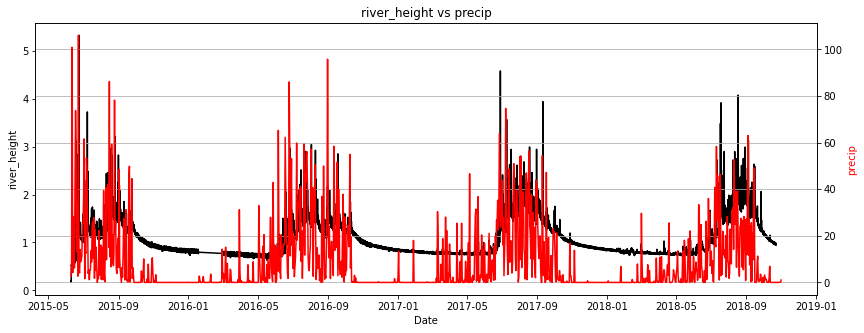

In [4]:
variable_1 = 'river_height'     # choose here between 'river_height', 'soil_moisure' or 'precip'
variable_2 = 'precip' # choose here between 'river_height', 'soil_moisure' or 'precip'

# Don't modify the code under
###################################################################################################

var_1 = dico_hydro['%s' %(variable_1)]
var_2 = dico_hydro['%s' %(variable_2)]
var_1_date = dico_hydro['date_' + '%s' %(variable_1)]
var_2_date = dico_hydro['date_' + '%s' %(variable_2)]


fig, ax1 = plt.subplots( figsize=(14,5))


ax2 = ax1.twinx()
ax1.plot(var_1_date,  var_1, 'k-')
ax2.plot(var_2_date,  var_2, 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('%s' %(variable_1), color='k')
ax2.set_ylabel('%s' %(variable_2), color='r')

plt.title('%s vs %s' %(variable_1, variable_2))
plt.grid(axis='both')
plt.show()

# 2. Velocity variations vs hydrology
In this cell, you can plot the hydrological variable of your choice vs the relative seismic velocity changes obtained in [%]. Just replace the name of variable_hydro at the top. 
Choices includes: 'river_height', 'soil_moisure' and 'precip'
For the unit: The river height is in [m], the soil moisture is in [m³/m³]  and the precipitation are in [mm/d]

/home/lillien/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


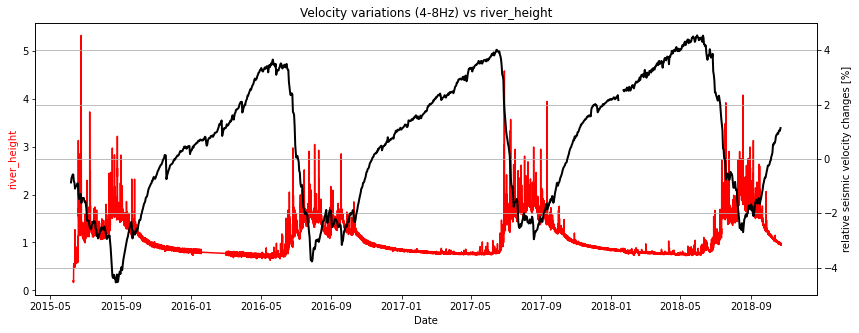

In [53]:
variable_hydro = 'river_height'     #choose here between 'river_height', 'soil_moisure' or 'precip'

# Don't modify the code under
###################################################################################################

var_hydro = dico_hydro['%s' %(variable_hydro)]
var_hydro_date = dico_hydro['date_' + '%s' %(variable_hydro)]


fig, ax1 = plt.subplots( figsize=(14,5))


ax2 = ax1.twinx()
ax2.plot(date_velocity,  velocity_4_8, 'k-', lineWidth='2')
ax1.plot(var_hydro_date,  var_hydro, 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('%s' %(variable_hydro), color='r')
ax2.set_ylabel('relative seismic velocity changes [%]', color='k')

plt.grid(axis='both')
plt.title('Velocity variations (4-8Hz) vs %s' %(variable_hydro))
plt.show()

# 3. Velocity variations at different frequencies 
In this cell, the plot is already compiled. You can run the cell to observe the velocity changes obtained at different frequencies.

/home/lillien/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lillien/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/lillien/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


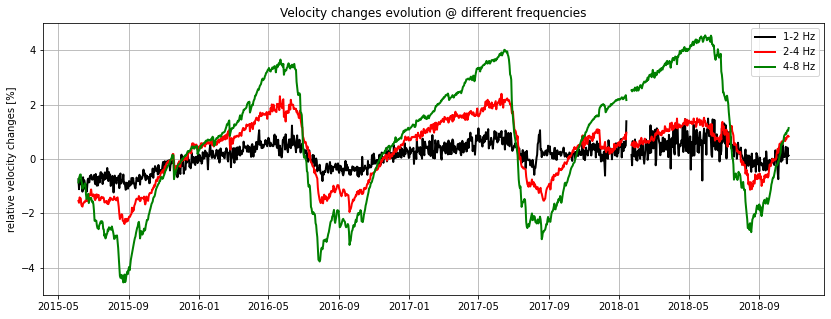

In [5]:
fig, ax1 = plt.subplots( figsize=(14,5))

ax1.plot(date_velocity,  velocity_1_2, 'k-', lineWidth='2',label = '1-2 Hz')
ax1.plot(date_velocity,  velocity_2_4, 'r-', lineWidth='2',label = '2-4 Hz')
ax1.plot(date_velocity,  velocity_4_8, 'g-', lineWidth='2',label = '4-8 Hz')

plt.legend()
plt.ylabel('relative velocity changes [%]')
plt.title('Velocity changes evolution @ different frequencies')
plt.grid()

# Bonus: The 2015 velocity variations

If we look at the velocity changes in 2015, they seem different compared to the following years. Nevertheless, the hydrological conditions looked similar. We know that a bit before the time-series, the earthquake of Gorkha occured with a magnitude of Mw7.8. What is happening here ?



/home/lillien/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


Text(0, 0.5, 'relative seismic velocity changes [%]')

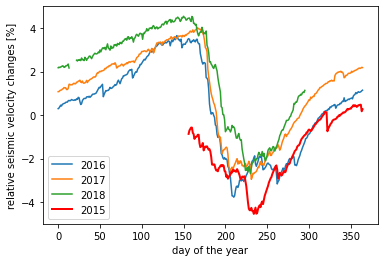

In [36]:
plt.plot(np.arange(365),velocity_4_8[209:209+365],  label='2016')
plt.plot(np.arange(365),velocity_4_8[209+365:209+(365*2)],  label='2017')
plt.plot(np.arange(296),velocity_4_8[209+(365*2)::],  label='2018')
plt.plot(np.arange(365-209,365),velocity_4_8[0:209], 'r', lineWidth='2', label='2015')
plt.legend()
plt.xlabel('day of the year')
plt.ylabel('relative seismic velocity changes [%]')